# Arrays: numpy

*Davide Gerosa (Milano-Bicocca)*

**Sources**: Michael Zingale at Stony Brook University: https://sbu-python-class.github.io

The numpy library provides a class for n-dimensional arrays of data. This
notebook is based on the numpy tutorial from the scipy webpage.

<div class="alert alert-block alert-warning">
    
Note that the traditional way to import numpy is to rename it np.  This saves on typing and makes your code a little more compact.</div>

In [2]:
import numpy as np

Numpy provides a multidimensional array class as well as a _large_ number of functions that operate on arrays.

Numpy arrays allow you to write fast (optimized) code that works on arrays of data.  To do this, there are some restrictions on arrays:

* all elements are of the same data type (e.g. float)
* the size of the array is fixed in memory, and specified when you create the array (e.g., you cannot grow the array like you do with lists)


The nice part is that arithmetic operations work on entire arrays&mdash;this means that you can avoid writing loops in python (which tend to be slow).  Instead the "looping" is done in the underlying compiled code. 

The usual criticism against python is that it's slow (because it's an interpreted language, not a compiled one like C). Well, that's not true; numpy achieves C-level speed. 

Always remember:

`Time to paper` = `time you need to write code` + `time the code runs`. 

No point wasting days debugging code to gain 1ms at run time.

## Array Creation and Properties

There are a lot of ways to create arrays.  Let's look at a few

Here we create an array using `arange` and then change its shape to be 3 rows and 5 columns.  Note the _row-major ordering_&mdash;you'll see that the rows are together in the inner `[]` (more on this in a bit)

In [3]:
a = np.arange(15)

In [4]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [5]:
a.shape

(15,)

In [6]:
a = np.arange(15).reshape(3,5)

print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [7]:
a.shape

(3, 5)

An array is an object of the `ndarray` class, and it has methods that know how to work on the array data.  Here, `.reshape()` is one of the many methods.

A numpy array has a lot of meta-data associated with it describing its shape, datatype, etc.

In [8]:
print(a.ndim)
print(a.shape)
print(a.size)
print(a.dtype)
print(a.itemsize)
print(type(a))

2
(3, 5)
15
int64
8
<class 'numpy.ndarray'>


In [6]:
#help(a)

We can also create an array from a list

In [12]:
b = np.array( [1, 2.1, 3, 4] )
print(b)
print(b.dtype)
print(type(b))

[1.  2.1 3.  4. ]
float64
<class 'numpy.ndarray'>


We can create a multi-dimensional array of a specified size initialized all to 0 easily, using the `zeros()` function.

In [15]:
b = np.zeros((10,8),dtype=int)
b

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

There is also an analogous `ones()` and `empty()` array routine.  Note that here we can explicitly set the datatype for the array in this function if we wish. 

Unlike lists in python, all of the elements of a numpy array are of the same datatype

In [16]:
c = np.eye(10, dtype=np.float64)
c

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

`linspace` creates an array with evenly space numbers.  The `endpoint` optional argument specifies whether the upper range is in the array or not

In [18]:
d = np.linspace(0, 1, 10, endpoint=True)
print(d)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


<div class="alert alert-block alert-warning">
    
<span class="fa fa-flash"></span> Quick Exercise:

Analogous to `linspace()`, there is a `logspace()` function that creates an array with elements equally spaced in log. Use `help(np.logspace)` to see the arguments, and create an array with 10 elements from $10^{-6}$ to $10^3$. Then do it again with `geomspace` and figure out the difference.

</div>

## Array Operations

Most operations (`+`, `-`, `*`, `/`) will work on an entire array at once, element-by-element.

Note that that the multiplication operator is not a matrix multiply (there is a new operator in python 3.5+, `@`, to do matrix multiplicaiton.

Let's create a simple array to start with

In [21]:
l=[1,2,3]

In [22]:
l*2

[1, 2, 3, 1, 2, 3]

In [26]:
np.array(l)*2

array([2, 4, 6])

In [27]:
a = np.arange(12).reshape(3,4)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Multiplication by a scalar multiplies every element

In [28]:
a*2

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

Adding two arrays adds element-by-element

In [29]:
a + a

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

Multiplying two arrays multiplies element-by-element

In [30]:
a*a

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121]])

<div class="alert alert-block alert-warning">
    
<span class="fa fa-flash"></span> Quick Exercise:

What do you think `1./a` will do?  Try it and see

</div>

We can think of our 2-d array as a 3 x 4 matrix (3 rows, 4 columns).  We can take the transpose to get a 4 x 3 matrix, and then we can do a matrix multiplication

We can do some basic linear algebra operations on arrays.  The operator `@` is a matrix multiplication / dot-product operator

In [31]:
b = a.transpose() ## Also a.T
b

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [32]:
a @ b

array([[ 14,  38,  62],
       [ 38, 126, 214],
       [ 62, 214, 366]])

We can sum the elements of an array:

In [38]:
a.sum()

66

In [36]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [37]:
a.sum(axis=1)

array([ 6, 22, 38])

<div class="alert alert-block alert-warning">
    
<span class="fa fa-flash"></span> Quick Exercise:

`sum()` takes an optional argument, `axis=N`, where `N` is the axis to sum over.  Sum the elements of `a` across rows to create an array with just the sum along each column of `a`.

</div>

We can also easily get the extrema

In [39]:
print(a.min(), a.max())

0 11


## Universal functions

Universal functions work element-by-element.  Let's create a new array scaled by `pi / 12`

In [40]:
b = a*np.pi/12.0
print(b)

[[0.         0.26179939 0.52359878 0.78539816]
 [1.04719755 1.30899694 1.57079633 1.83259571]
 [2.0943951  2.35619449 2.61799388 2.87979327]]


In [41]:
c = np.cos(b)
print(c)

[[ 1.00000000e+00  9.65925826e-01  8.66025404e-01  7.07106781e-01]
 [ 5.00000000e-01  2.58819045e-01  6.12323400e-17 -2.58819045e-01]
 [-5.00000000e-01 -7.07106781e-01 -8.66025404e-01 -9.65925826e-01]]


In [42]:
d = b + c 

In [43]:
print(d)

[[1.         1.22772521 1.38962418 1.49250494]
 [1.54719755 1.56781598 1.57079633 1.57377667]
 [1.5943951  1.64908771 1.75196847 1.91386744]]


<div class="alert alert-block alert-warning">
    
<span class="fa fa-flash"></span> Quick Exercise:

We will often want to write our own function that operates on an array and returns a new array.  We can do this just like we did with functions previously&mdash;the key is to use the methods from the `np` module to do any operations, since they work on, and return, arrays.

Write a simple function that returns $\sin(2\pi x)$ for an input array `x`.  Then test it 
by passing in an array `x` that you create via `linspace()`

</div>

## Slicing

Slicing works very similarly to how we saw with strings.  Remember, python uses 0-based indexing

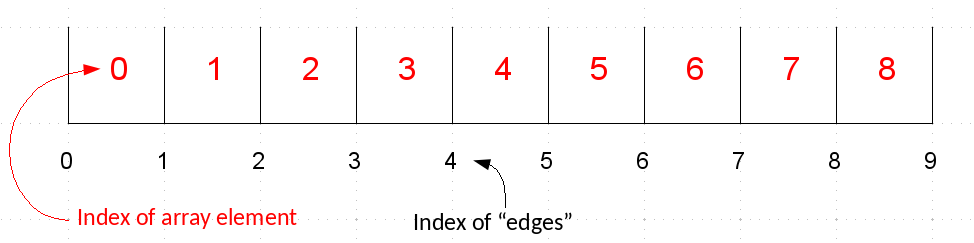

Let's create this array from the image:

In [44]:
a = np.arange(9)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

Now look at accessing a single element vs. a range (using slicing)

Giving a single (0-based) index just references a single value

In [45]:
a[2]

2

Giving a range uses the range of the edges to return the values

In [46]:
print(a[2:4])

[2 3]


The `:` can be used to specify all of the elements in that dimension

In [47]:
a[:]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [51]:
np.arange(15).reshape(5,3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [52]:
np.arange(15).reshape(5,3)[1:2,2]

array([5])

## Multidimensional Arrays

Multidimensional arrays are stored in a contiguous space in memory -- this means that the columns / rows need to be unraveled (flattened) so that it can be thought of as a single one-dimensional array.  Different programming languages do this via different conventions:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Row_and_column_major_order.svg/340px-Row_and_column_major_order.svg.png)

Storage order:

* Python/C use *row-major* storage: rows are stored one after the other
* Fortran/matlab use *column-major* storage: columns are stored one after another

The ordering matters when 

* Passing arrays between languages 
* Looping over arrays -- you want to access elements that are next to one-another in memory
  * e.g, in Fortran:
  
    ```
    double precision :: A(M,N)
    do j = 1, N
       do i = 1, M
          A(i,j) = …
       enddo
    enddo
    ```
  
  * in C
  
    ```
    double A[M][N];
    for (i = 0; i < M; i++) {
       for (j = 0; j < N; j++) {
          A[i][j] = …
       }
    }  
    ```
  

In python, using numpy, we'll try to avoid explicit loops over elements as much as possible

Let's look at multidimensional arrays:

In [55]:
a = np.arange(15).reshape(3,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [56]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Notice that the output of `a` shows the row-major storage.  The rows are grouped together in the inner `[...]`

Giving a single index (0-based) for each dimension just references a single value in the array

In [57]:
a[1,1]

6

Doing slices will access a range of elements.  Think of the start and stop in the slice as referencing the left-edge of the slots in the array.

In [33]:
a[0:2,0:2]

array([[0, 1],
       [5, 6]])

Access a specific column

In [34]:
a[:,1]

array([ 1,  6, 11])

Sometimes we want a one-dimensional view into the array -- here we see the memory layout (row-major) more explicitly

In [59]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [60]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

we can also iterate -- this is done over the first axis (rows)

In [62]:
for row in a:
    print(row)

[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13 14]


In [63]:
for row in a:
    for el in row:
        print(el)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


or element by element

In [64]:
for e in a.flat:
    print(e)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


Generally speaking, we want to avoid looping over the elements of an array in python&mdash;this is slow.  Instead we want to write and use functions that operate on the entire array at once.

<div class="alert alert-block alert-warning">
    
<span class="fa fa-flash"></span> Quick Exercise:

Consider the array defined as:

```

 q = np.array([[1, 2, 3, 2, 1],
               [2, 4, 4, 4, 2],
               [3, 4, 4, 4, 3],
               [2, 4, 4, 4, 2],
               [1, 2, 3, 2, 1]])
 
```

  * Using slice notation, create an array that consists of only the `4`'s in `q` (this will be called a _view_, as we'll see shortly)
  * Zero out all of the elements in your view
  * How does `q` change?
</dov> 

## Copying Arrays

Simply using "=" does not make a copy, but much like with lists, you will just have multiple names pointing to the same ndarray object

Therefore, we need to understand if two arrays, `A` and `B` point to:
* the same array, including shape and data/memory space
* the same data/memory space, but perhaps different shapes (a _view_)
* a separate copy of the data (i.e. stored completely separately in memory)

All of these are possible:
* `B = A`
  
  this is _assignment_.  No copy is made. `A` and `B` point to the same data in memory and share the same shape, etc.  They are just two different labels for the same object in memory
  

* `B = A[:]`

  this is a _view_ or _shallow copy_.  The shape info for A and B are stored independently, but both point to the same memory location for data
  
  
* `B = A.copy()`

  this is a _deep_ copy.  A completely separate object will be created in memory, with a completely separate location in memory.
  
Let's look at examples

In [65]:
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


Here is assignment&mdash;we can just use the `is` operator to test for equality

In [66]:
b = a
b is a

True

Since `b` and `a` are the same, changes to the shape of one are reflected in the other&mdash;no copy is made.

In [67]:
b.shape = (2, 5)
print(b)
a.shape

[[0 1 2 3 4]
 [5 6 7 8 9]]


(2, 5)

In [68]:
b is a

True

In [69]:
print(a)

[[0 1 2 3 4]
 [5 6 7 8 9]]


A shallow copy creates a new *view* into the array&mdash;the _data_ is the same, but the array _properties_ can be different

In [70]:
a = np.arange(12)
c = a[:]
a.shape = (3,4)

print(a)
print(c)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


Since the underlying data is the same memory, changing an element of one is reflected in the other

In [71]:
c[1] = -1
print(a)

[[ 0 -1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Even slices into an array are just views, still pointing to the same memory

In [72]:
d = c[3:8]
print(d)

[3 4 5 6 7]


In [73]:
d[:] = 0 

In [74]:
print(a)
print(c)
print(d)

[[ 0 -1  2  0]
 [ 0  0  0  0]
 [ 8  9 10 11]]
[ 0 -1  2  0  0  0  0  0  8  9 10 11]
[0 0 0 0 0]


There are lots of ways to inquire if two arrays are the same, views, own their own data, etc

In [76]:
print(c is a)
print(c.base is a)
#print(c.flags.owndata)
#print(a.flags.owndata)

False
True


To make a copy of the data of the array that you can deal with independently of the original, you need a _deep copy_

In [77]:
d = a.copy()
d[:,:] = 0.0

print(a)
print(d)

[[ 0 -1  2  0]
 [ 0  0  0  0]
 [ 8  9 10 11]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


## Boolean indexing (aka masking)

There are lots of fun ways to index arrays to access only those elements that meet a certain condition

In [94]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Here we set all the elements in the array that are > 4 to zero

In [85]:
a > 4

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

In [86]:
a[a > 4]

array([ 5,  6,  7,  8,  9, 10, 11])

In [87]:
a[a > 4] = 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

In [89]:
a = np.arange(12)
b = np.arange(12)*123

In [91]:
b

array([   0,  123,  246,  369,  492,  615,  738,  861,  984, 1107, 1230,
       1353])

In [92]:
a>6

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True])

In [90]:
b[a>6]

array([ 861,  984, 1107, 1230, 1353])

and now, all the zeros to -1

In [95]:
a[a == 0] = -1
a

array([[-1,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

If we have 2 tests, we need to use `logical_and()` or `logical_or()`

In [96]:
a = np.arange(12).reshape(3,4)
a[np.logical_and(a > 3, a <= 9)] = 0.0
a

array([[ 0,  1,  2,  3],
       [ 0,  0,  0,  0],
       [ 0,  0, 10, 11]])

Our test that we index the array with returns a boolean array of the same shape:

In [60]:
a > 4

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

If you have three or more tests, look into `reduce()`.

## Avoiding loops

In general, you want to avoid loops over elements on an array.

Here, let's create 1-d x and y coordinates and then try to fill some larger array

In [111]:
M = 3200
N = 6400
xmin = ymin = 0.0
xmax = ymax = 1.0

x = np.linspace(xmin, xmax, M, endpoint=False)
y = np.linspace(ymin, ymax, N, endpoint=False)

print(x.shape)
print(y.shape)

(3200,)
(6400,)


We'll time our code

In [112]:
import time

In [113]:
t0 = time.time()

g = np.zeros((M, N))

for i in range(M):
    for j in range(N):
        g[i,j] = np.sin(2.0*np.pi*x[i]*y[j])
        
t1 = time.time()
print("time elapsed: {} s".format(t1-t0))

time elapsed: 11.915959119796753 s


Now let's instead do this using all array syntax.  First will extend our 1-d coordinate arrays to be 2-d.  Numpy has a function for this (`meshgrid()`)

In [152]:
x2d, y2d = np.meshgrid(x, y, indexing="ij")

print(x2d[:,0])
print(x2d[0,:])

print(y2d[:,0])
print(y2d[0,:])

[0. 0. 0. ... 0. 0. 0.]
[0.         0.26179939 0.52359878 0.78539816 1.04719755 1.30899694
 1.57079633 1.83259571 2.0943951  2.35619449 2.61799388 2.87979327
 3.14159265 3.40339204 3.66519143 3.92699082 4.1887902  4.45058959
 4.71238898 4.97418837 5.23598776 5.49778714 5.75958653 6.02138592
 6.28318531]
[0.0000000e+00 1.5625000e-04 3.1250000e-04 ... 9.9953125e-01 9.9968750e-01
 9.9984375e-01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [154]:
t0 = time.time()
g2 = np.sin(2.0*np.pi*x2d*y2d)
t1 = time.time()
print("time elapsed: {} s".format(t1-t0))

time elapsed: 0.011608123779296875 s


In [118]:
print(np.max(np.abs(g2-g)))

0.0


### Numerical differentiation

Now we want to construct a derivative, 
$$
\frac{d f}{dx}
$$

In [120]:
x = np.linspace(0, 2*np.pi, 25)
f = np.sin(x)

In [125]:
x

array([0.        , 0.26179939, 0.52359878, 0.78539816, 1.04719755,
       1.30899694, 1.57079633, 1.83259571, 2.0943951 , 2.35619449,
       2.61799388, 2.87979327, 3.14159265, 3.40339204, 3.66519143,
       3.92699082, 4.1887902 , 4.45058959, 4.71238898, 4.97418837,
       5.23598776, 5.49778714, 5.75958653, 6.02138592, 6.28318531])

In [128]:
x[1]

0.2617993877991494

In [130]:
x[-4:-2]

array([5.49778714, 5.75958653])

We want to do this without loops&mdash;we'll use views into arrays offset from one another.  Recall from calculus that a derivative is approximately:
$$
\frac{df}{dx} = \frac{f(x+h) - f(x)}{h}
$$
Here, we'll take $h$ to be a single adjacent element

In [121]:
f

array([ 0.00000000e+00,  2.58819045e-01,  5.00000000e-01,  7.07106781e-01,
        8.66025404e-01,  9.65925826e-01,  1.00000000e+00,  9.65925826e-01,
        8.66025404e-01,  7.07106781e-01,  5.00000000e-01,  2.58819045e-01,
        1.22464680e-16, -2.58819045e-01, -5.00000000e-01, -7.07106781e-01,
       -8.66025404e-01, -9.65925826e-01, -1.00000000e+00, -9.65925826e-01,
       -8.66025404e-01, -7.07106781e-01, -5.00000000e-01, -2.58819045e-01,
       -2.44929360e-16])

In [122]:
f[1:]

array([ 2.58819045e-01,  5.00000000e-01,  7.07106781e-01,  8.66025404e-01,
        9.65925826e-01,  1.00000000e+00,  9.65925826e-01,  8.66025404e-01,
        7.07106781e-01,  5.00000000e-01,  2.58819045e-01,  1.22464680e-16,
       -2.58819045e-01, -5.00000000e-01, -7.07106781e-01, -8.66025404e-01,
       -9.65925826e-01, -1.00000000e+00, -9.65925826e-01, -8.66025404e-01,
       -7.07106781e-01, -5.00000000e-01, -2.58819045e-01, -2.44929360e-16])

In [123]:
f[:-1]

array([ 0.00000000e+00,  2.58819045e-01,  5.00000000e-01,  7.07106781e-01,
        8.66025404e-01,  9.65925826e-01,  1.00000000e+00,  9.65925826e-01,
        8.66025404e-01,  7.07106781e-01,  5.00000000e-01,  2.58819045e-01,
        1.22464680e-16, -2.58819045e-01, -5.00000000e-01, -7.07106781e-01,
       -8.66025404e-01, -9.65925826e-01, -1.00000000e+00, -9.65925826e-01,
       -8.66025404e-01, -7.07106781e-01, -5.00000000e-01, -2.58819045e-01])

In [81]:
dx = x[1] - x[0]
dfdx = (f[1:] - f[:-1])/dx

In [82]:
dfdx

array([ 0.98861593,  0.92124339,  0.79108963,  0.60702442,  0.38159151,
        0.13015376, -0.13015376, -0.38159151, -0.60702442, -0.79108963,
       -0.92124339, -0.98861593, -0.98861593, -0.92124339, -0.79108963,
       -0.60702442, -0.38159151, -0.13015376,  0.13015376,  0.38159151,
        0.60702442,  0.79108963,  0.92124339,  0.98861593])

# Exercises

For the exams, prepare 2 of these exercises. Or only one if you like Q6 (actually, if you go for Q6 feel free to skip a question from another lecture as well). Pick the ones you like the most.

Some  of these come from / are inspired from https://github.com/rougier/numpy-100 and http://www.scipy-lectures.org/intro/numpy/exercises.html

## Q1: Fun with arrays

**A.**  Create the array: 
```
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]
```
with out explicitly typing it in.

Now create a new array containing only its 2nd and 4th rows.


**B.** Create a 2d array with `1` on the border and `0` on the inside, e.g., like:
```
1 1 1 1 1
1 0 0 0 1
1 0 0 0 1
1 1 1 1 1
```

Do this using array slice notation to let it work for an arbitrary-sized array

## Q2: Histograms

Here we will read in columns of numbers from a file and create a histogram, using NumPy routines.  Make sure you have the data file
"`sample.txt`" in the same directory as this notebook. You download it from  https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-3/sample.txt (and use python to download a file!)

  * Use `np.loadtxt()` to read this file in.  

  * Next, use `np.histogram()` to create a histogram array.  The output returns both the count and an array of edges.
  
  * Finally, loop over the bins and print out the bin center (averaging the left and right edges of the bin) and the count for that bin.

## Q3: Are you faster than numpy?

Numpy of course has a standard deviation function, `np.std()`, but here we'll write our own that works on a 1-d array (vector).  The standard
deviation is a measure of the "width" of the distribution of numbers
in the vector.

Given an array, $a$, and an average $\bar{a}$, the standard deviation
is:
$$
\sigma = \left [ \frac{1}{N} \sum_{i=1}^N (a_i - \bar{a})^2 \right ]^{1/2}
$$

Write a function to calculate the standard deviation for an input array, `a`:

  * First compute the average of the elements in `a` to define $\bar{a}$
  * Next compute the sum over the squares of $a - \bar{a}$
  * Then divide the sum by the number of elements in the array
  * Finally take the square root (you can use `np.sqrt()`)
  
Test your function on a random array, and compare to the built-in `np.std()`. Check the runtime as well.

## Q4: Bootstraps

Bootstrapping is a prominent statistical technique to estimate errors when you're stuck and don't know what else to o: https://erikjanvankesteren.nl/blog/2018-03-01-baron-bootstrap.html

Generate a 1D array (say from a Gaussian, but then add some outliers for fun). Compute the bootstrapped 95% confidence intervals for the mean of that array (i.e., resample the elements of an array with replacement N times, compute the mean of each sample, and then compute percentiles over the means). 

## Q5: Einstein summation

einsum is a powerful (but often painful) numpy thing:
- https://numpy.org/doc/stable/reference/generated/numpy.einsum.html
- https://stackoverflow.com/questions/26089893/understanding-numpys-einsum

Take 2 vectors A and B. Write the einsum equivalent of inner, outer, sum, and mul function.

## Q6: Conway's Game of Life

**Exercise**: Code up Conway's Game of Life using numpy 

The Game of Life is a cellular automaton devised by mathematician John Horton Conway in 1970. It is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves. It is Turing complete and can simulate a universal constructor or any other Turing machine.

https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life

The Game of Life is *really* (really, really) cool. There are just four extremely simple rules, and these result in an immense richness of behaviour and complexity.

https://www.youtube.com/watch?v=C2vgICfQawE&t=221s&ab_channel=RationalAnimations

https://www.youtube.com/watch?v=jvSp6VHt_Pc&ab_channel=TheDevDoctor

Here some web apps to play:

https://conwaylife.com/

https://playgameoflife.com/

Some computational hints:

https://blog.datawrapper.de/game-of-life/

For instance, here is a Game-of-Life structure that sends a message at fixed intervals (that little spaceship leaving toward the bottom right)

![](https://blog.datawrapper.de/wp-content/uploads/2021/06/game-of-life-loop-cropped.gif)
